# Average delay by month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('avg_delay.csv', sep='\t',names=['month','to_split'])
df

,month,to_split
0,1,"[9.51739905695707, 5.6533274605930615]"
1,2,"[11.329804213042678, 7.903148015685324]"
2,3,"[9.457096004060977, 4.801888513459922]"
3,4,"[7.654192199954241, 3.1247219937710113]"
4,5,"[9.352638769560135, 4.4186718927630775]"
5,6,"[13.744596613990558, 9.391036263363347]"
6,7,"[11.2960393149459, 6.353538767624703]"
7,8,"[9.840240453170786, 4.547990739144742]"
8,9,"[4.803557832522486, -0.7679300391873465]"
9,10,"[4.958688922485164, -0.7751133874301934]"


Columns have to be split 

In [3]:
df[['departure_delay','arrival_delay']] = df.to_split.str[1:-1].str.split(', ').apply(pd.Series)
df

,month,to_split,departure_delay,arrival_delay
0,1,"[9.51739905695707, 5.6533274605930615]",9.51739905695707,5.6533274605930615
1,2,"[11.329804213042678, 7.903148015685324]",11.329804213042678,7.903148015685324
2,3,"[9.457096004060977, 4.801888513459922]",9.457096004060977,4.801888513459922
3,4,"[7.654192199954241, 3.1247219937710113]",7.654192199954241,3.1247219937710113
4,5,"[9.352638769560135, 4.4186718927630775]",9.352638769560135,4.4186718927630775
5,6,"[13.744596613990558, 9.391036263363347]",13.744596613990558,9.391036263363347
6,7,"[11.2960393149459, 6.353538767624703]",11.2960393149459,6.353538767624703
7,8,"[9.840240453170786, 4.547990739144742]",9.840240453170786,4.547990739144742
8,9,"[4.803557832522486, -0.7679300391873465]",4.803557832522486,-0.7679300391873465
9,10,"[4.958688922485164, -0.7751133874301934]",4.958688922485164,-0.7751133874301934


In [4]:
df = df.drop(columns='to_split')
df

,month,departure_delay,arrival_delay
0,1,9.51739905695707,5.6533274605930615
1,2,11.329804213042678,7.903148015685324
2,3,9.457096004060977,4.801888513459922
3,4,7.654192199954241,3.1247219937710113
4,5,9.352638769560135,4.4186718927630775
5,6,13.744596613990558,9.391036263363347
6,7,11.2960393149459,6.353538767624703
7,8,9.840240453170786,4.547990739144742
8,9,4.803557832522486,-0.7679300391873465
9,10,4.958688922485164,-0.7751133874301934


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            12 non-null     int64 
 1   departure_delay  12 non-null     object
 2   arrival_delay    12 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [6]:
df['departure_delay']=df['departure_delay'].astype(float)
df['arrival_delay']=df['arrival_delay'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            12 non-null     int64  
 1   departure_delay  12 non-null     float64
 2   arrival_delay    12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 416.0 bytes


In [8]:
df['departure_delay']=df['departure_delay'].apply(lambda x: round(x,2))
df['arrival_delay']=df['arrival_delay'].apply(lambda x: round(x,2))

In [9]:
df

,month,departure_delay,arrival_delay
0,1,9.52,5.65
1,2,11.33,7.90
2,3,9.46,4.80
3,4,7.65,3.12
4,5,9.35,4.42
5,6,13.74,9.39
6,7,11.30,6.35
7,8,9.84,4.55
8,9,4.80,-0.77
9,10,4.96,-0.78


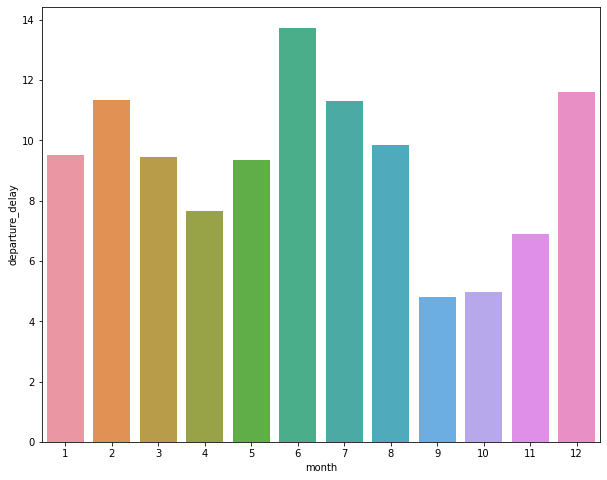

In [10]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'month', y='departure_delay' ,data = df)
plt.show()

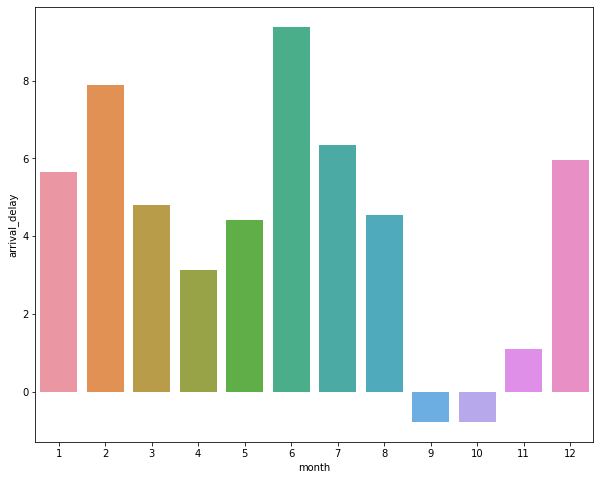

In [11]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'month', y='arrival_delay' ,data = df)
plt.show()

### Conclusion

After first sight at the charts we can notice the most delay month is june. It can be caused by vacations. Increase of departure  and arrival delay is also visible in December which is caused by holiday.